# Análisis Exploratorio de Datos - EDA

## Limpieza e imputación de datos

In [1]:
import datetime as dt
import pandas as pd
import pathlib
import os
import time
import seaborn as sns
import matplotlib.pyplot as plt
# os.chdir(pathlib.Path.cwd())

#Conexión de google drive con el repo
from google.colab import drive
drive.mount('/content/drive')

###==========================
ruta = os.path.join("/content/drive/MyDrive","MonografiaUdeA")
os.chdir(ruta)
abspath = pathlib.Path.cwd()
print(f"Directorio de trabajo: {abspath}")
###==========================

Mounted at /content/drive
Directorio de trabajo: /content/drive/MyDrive/MonografiaUdeA


In [2]:
df = pd.read_csv(os.path.join(abspath,"datasets", "procesado", "1_dataset_unificado.csv"))
df1 = df.copy()
df.head(3)

,fecha,precio_bolsa,demanda,disp_dec_hidraulica,disp_dec_no_termica,disp_dec_termica,disponibilidad_declarada,gen_hidraulica,gen_no_termica,gen_termica,generacion,aportes_energia,precio_oferta,vol_util,indice_ONI,vertimientos
0,2010-01-01,120.501228,1.133616e+08,356125.000000,102616.666667,121611.607143,213690.151515,35796804.67,13362226.83,66260052.96,1.154191e+08,45616100.0,267.437633,1.000661e+10,1.5,NaN
1,2010-01-02,118.495340,1.254718e+08,353776.515152,102616.666667,121633.928571,212762.121212,46595646.99,13393741.63,67691806.16,1.276812e+08,43097100.0,277.153592,9.995147e+09,1.5,NaN
2,2010-01-03,121.160145,1.211452e+08,356579.545455,102616.666667,119455.357143,212774.242424,42578875.20,13046074.83,68012828.41,1.236378e+08,43400400.0,313.552755,9.992677e+09,1.5,NaN


In [3]:
df = df.set_index('fecha')
df.index = pd.to_datetime(df.index)
df.describe()

,precio_bolsa,demanda,disp_dec_hidraulica,disp_dec_no_termica,disp_dec_termica,disponibilidad_declarada,gen_hidraulica,gen_no_termica,gen_termica,generacion,aportes_energia,precio_oferta,vol_util,indice_ONI,vertimientos
count,3652.000000,3.652000e+03,3652.000000,3652.000000,3652.000000,3652.000000,3.652000e+03,3.652000e+03,3.652000e+03,3.652000e+03,3.652000e+03,3652.000000,3.652000e+03,3652.000000,1.982000e+03
mean,185.084195,1.734175e+08,309486.664271,71813.588114,114963.904889,190743.105544,1.324631e+08,3.959264e+06,3.889035e+07,1.753127e+08,1.555487e+08,301.260578,1.052571e+10,0.036802,1.202052e+07
std,170.130915,1.719464e+07,71946.292966,42172.204007,12606.324139,34869.660776,2.305263e+07,2.160212e+06,1.716655e+07,1.670075e+07,7.514331e+07,72.950289,2.165622e+09,0.882722,1.730633e+07
min,35.356673,1.133616e+08,186919.501263,0.000000,79440.486111,124933.402968,3.579680e+07,1.328458e+06,1.197768e+07,1.154191e+08,2.903210e+07,188.077521,5.776673e+09,-1.600000,4.387172e+01
25%,95.595586,1.611664e+08,240872.451779,34109.535256,106695.684524,156938.100692,1.191720e+08,2.960760e+06,2.476474e+07,1.636234e+08,1.019486e+08,245.612168,8.861809e+09,-0.525000,1.493444e+06
50%,146.233215,1.749549e+08,313416.666667,66109.000000,114439.660304,197596.212121,1.339038e+08,3.451657e+06,3.564647e+07,1.771236e+08,1.438747e+08,290.597951,1.074591e+10,0.000000,4.515565e+06
75%,194.490720,1.866113e+08,375712.500000,104666.666667,123360.488506,221791.832000,1.463502e+08,4.091160e+06,4.994093e+07,1.886174e+08,1.920314e+08,336.849947,1.236404e+10,0.500000,1.537456e+07
max,1942.692797,2.137784e+08,445450.000000,157000.000000,148258.928571,260369.897959,1.805965e+08,1.725661e+07,9.357261e+07,2.151544e+08,5.912453e+08,736.062549,1.450158e+10,2.600000,1.367190e+08


In [4]:
df.isnull().sum()

precio_bolsa                   0
demanda                        0
disp_dec_hidraulica            0
disp_dec_no_termica            0
disp_dec_termica               0
disponibilidad_declarada       0
gen_hidraulica                 0
gen_no_termica                 0
gen_termica                    0
generacion                     0
aportes_energia                0
precio_oferta                  0
vol_util                       0
indice_ONI                     0
vertimientos                1670
dtype: int64

Imputación de nulos, indican que no hubo vertimientos en el sistema

In [5]:
df['vertimientos'] = df['vertimientos'].fillna(0)
df.isnull().sum()

precio_bolsa                0
demanda                     0
disp_dec_hidraulica         0
disp_dec_no_termica         0
disp_dec_termica            0
disponibilidad_declarada    0
gen_hidraulica              0
gen_no_termica              0
gen_termica                 0
generacion                  0
aportes_energia             0
precio_oferta               0
vol_util                    0
indice_ONI                  0
vertimientos                0
dtype: int64

In [6]:
df.to_csv(os.path.join(abspath,"datasets", "procesado","2_dataset_procesado.csv"))

In [7]:
df.dtypes

precio_bolsa                float64
demanda                     float64
disp_dec_hidraulica         float64
disp_dec_no_termica         float64
disp_dec_termica            float64
disponibilidad_declarada    float64
gen_hidraulica              float64
gen_no_termica              float64
gen_termica                 float64
generacion                  float64
aportes_energia             float64
precio_oferta               float64
vol_util                    float64
indice_ONI                  float64
vertimientos                float64
dtype: object

## Análisis univariado

### Visualización de la serie

<ipython-input-8-d5587ffd0171>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


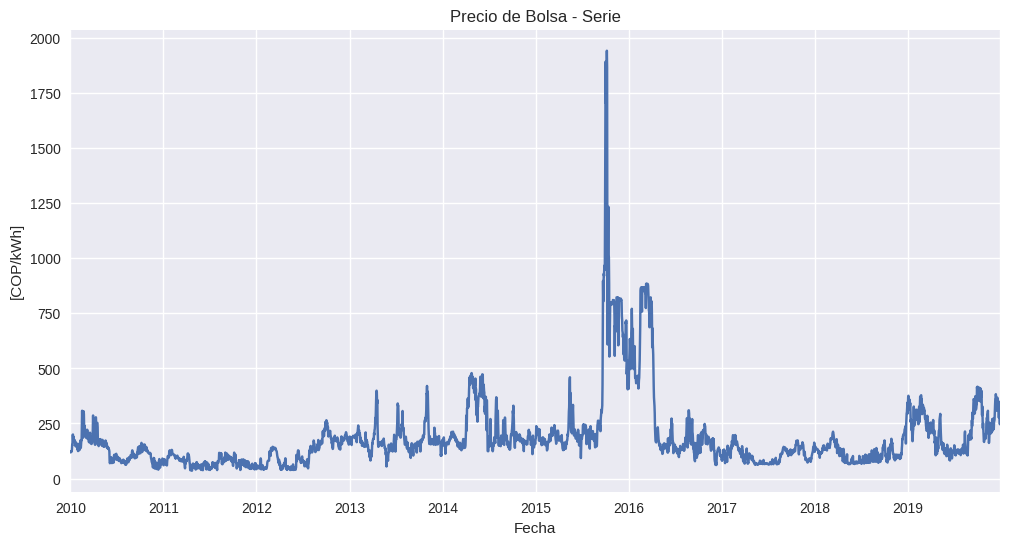

In [8]:
plt.style.use("seaborn")
plt.figure(figsize=(12,6))
df['precio_bolsa'].plot(title='Precio de Bolsa - Serie')
plt.ylabel('[COP/kWh]')
plt.xlabel('Fecha')
plt.show();

Es posible observar cierta estacionalidad, exceptuando el periodo 2015-2016 impactado por el fenómeno del niño, que causó, debido al déficit hídrico un alza en el precio de la energía fuera de la tendencia

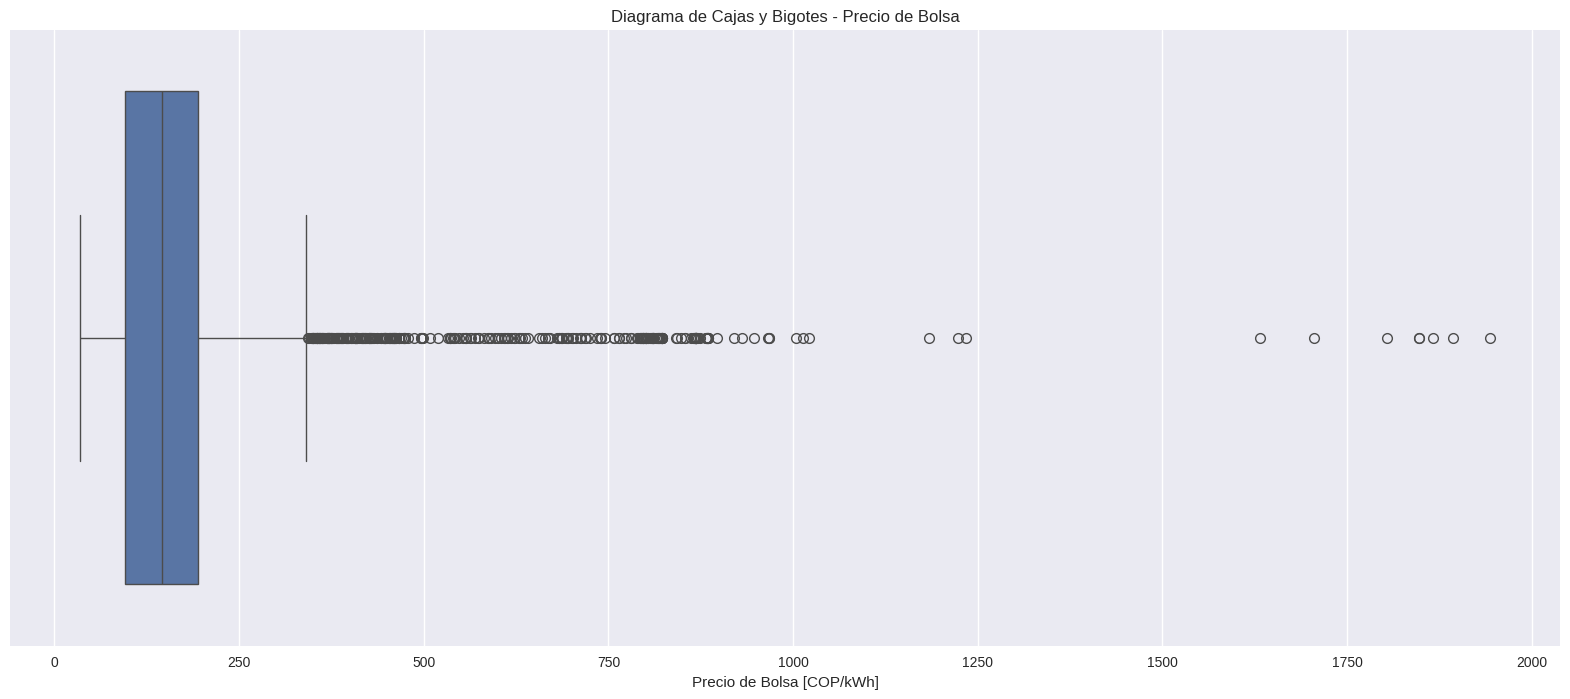

In [9]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, x='precio_bolsa')
plt.xlabel('Precio de Bolsa [COP/kWh]')
plt.title(f'Diagrama de Cajas y Bigotes - Precio de Bolsa');

### Autocorrelación de la serie

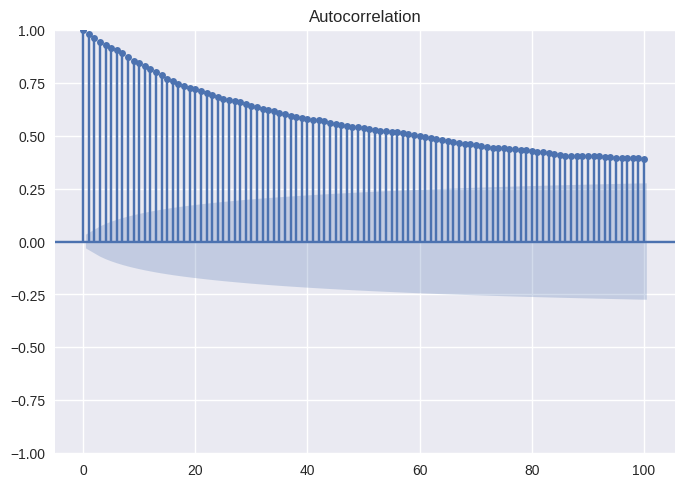

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
series = df.precio_bolsa
plot_acf(series, lags = 100)
plt.show()

Es posible observar que la serie está autocorrelacionada, por lo que es apropiado realizar un pronóstico (teoría).

Con los lag's se determina los pasos hacia atrás que se tratarán en el modelo de DL

### Autocorrelación parcial

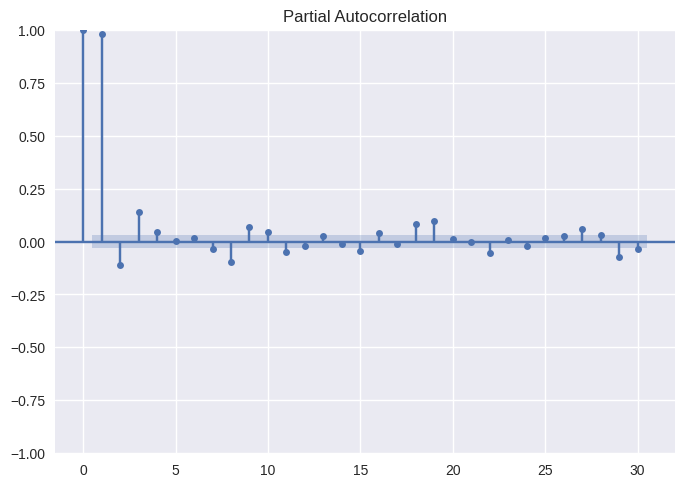

In [11]:
plot_pacf(series, lags = 30)
plt.show()

El valor de análisis tiene una alta correlación con el valor anterior

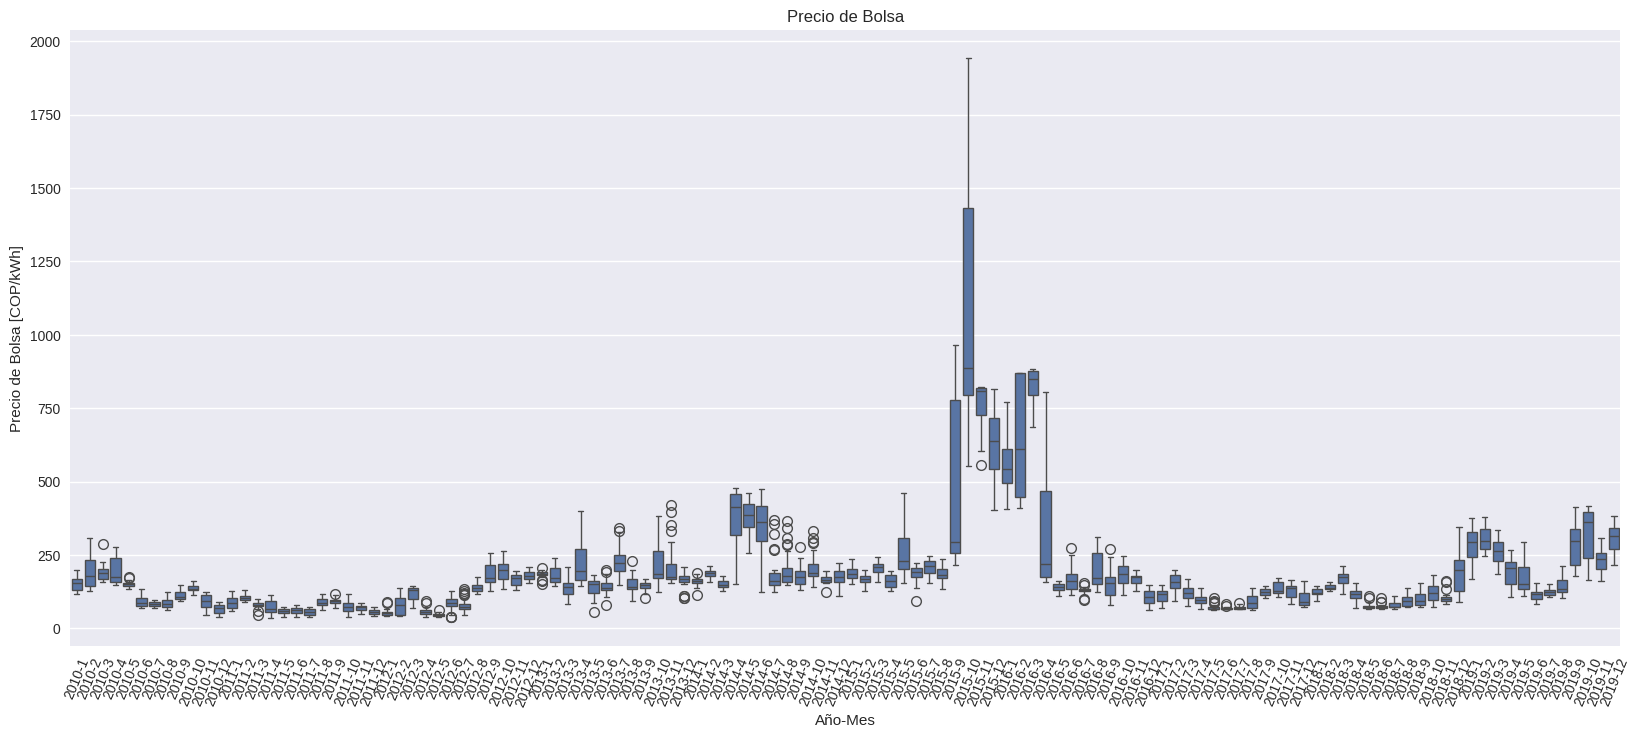

In [12]:
df['year'] = [x for x in df.index.year]
df['month'] = [x for x in df.index.month]
df['year_month'] = [str(x.year) + '-' + str(x.month) for x in df.index]

df_plot = df[df['year'] >= 2010].reset_index().sort_values(by='fecha').set_index('fecha')
plt.figure(figsize=(20,8))
plt.xticks(rotation=90*(3/4))

sns.boxplot(x='year_month', y='precio_bolsa', data=df_plot)
plt.xlabel('Año-Mes')
plt.ylabel('Precio de Bolsa [COP/kWh]')
plt.title(f'Precio de Bolsa');

Es posible observar que en Verano (Los meses: dic., ene., feb., mar., abr.) los precios tienden a ser más volátiles y con una tendencia al alza.

### Precio de Oferta

<ipython-input-13-6ed34b8f7069>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


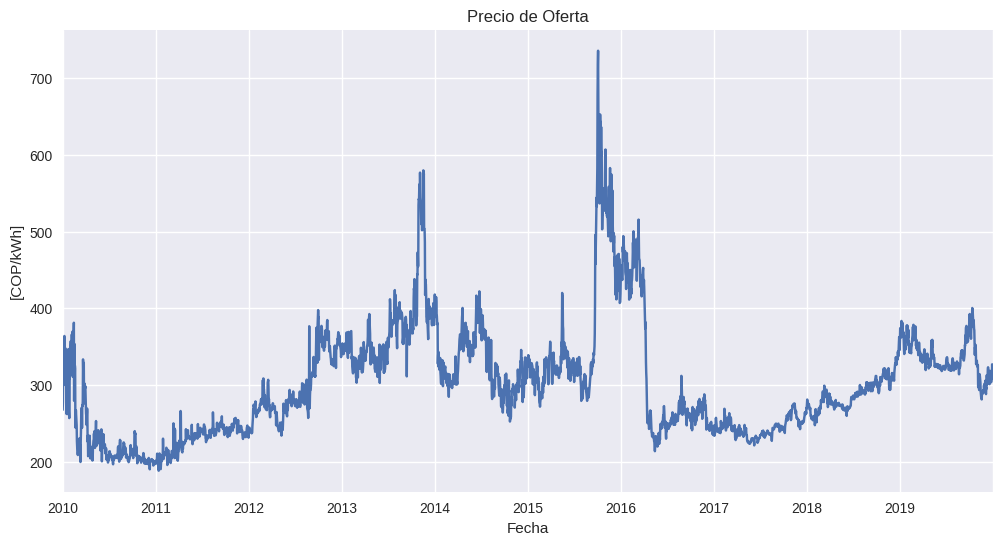

In [13]:
plt.style.use("seaborn")
plt.figure(figsize=(12,6))
df['precio_oferta'].plot(title='Precio de Oferta')
plt.ylabel('[COP/kWh]')
plt.xlabel('Fecha')
plt.show();

In [14]:
df = df1.copy()
df = df.set_index('fecha')

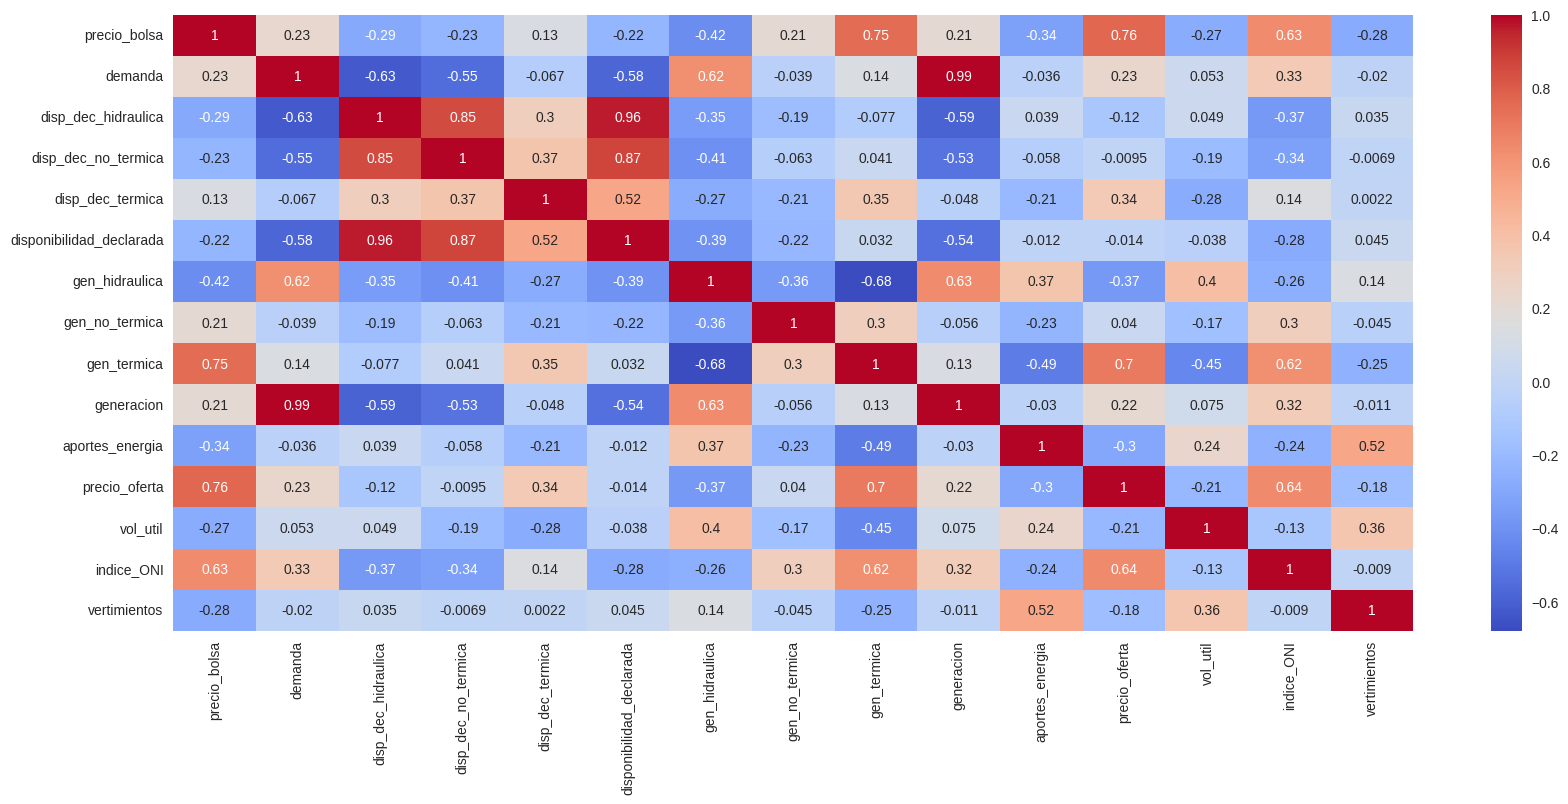

In [15]:
# Heatmap of correlation matrix
plt.figure(figsize = (20,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Filtrado variables

De acuerdo con la matriz de correlación, es posible eliminar variables con una correlación mayor al 80% ya que son linealmente dependientes; esto, con la finalidad de simplificar el modelo.

In [16]:
df_filtrado = pd.read_csv(os.path.join(abspath,"datasets", "procesado", "2_dataset_procesado.csv"))
df_filtrado = df_filtrado.set_index('fecha')

In [17]:
for variable_interes in df_filtrado.corr().index:
  if "precio_bolsa" not in variable_interes:
      correlations = df_filtrado.corr()[variable_interes].abs()
      correlation_with_pbolsa = correlations.loc['precio_bolsa']
      # print(correlation_with_pbolsa)
      strong_correlations = correlations[(correlations > 0.8) & (correlations < 1.0)]
      for variable, correlation_value in strong_correlations.items():
        print(f"La variable {variable_interes} está correlacionada en mas del 80% con '{variable}' y el valor es: {correlation_value:.3f}.\nAdemás, La correlación con el precio de bolsa es: {correlation_with_pbolsa:.3f}\n")
      # df_filtrado.info()
      # print(f"La variable {variable_interes} tiene una correlación de mas del 80% con {variables_a_excluir.to_list()}, y su peso es:")

La variable demanda está correlacionada en mas del 80% con 'generacion' y el valor es: 0.994.
Además, La correlación con el precio de bolsa es: 0.227

La variable disp_dec_hidraulica está correlacionada en mas del 80% con 'disp_dec_no_termica' y el valor es: 0.854.
Además, La correlación con el precio de bolsa es: 0.289

La variable disp_dec_hidraulica está correlacionada en mas del 80% con 'disponibilidad_declarada' y el valor es: 0.965.
Además, La correlación con el precio de bolsa es: 0.289

La variable disp_dec_no_termica está correlacionada en mas del 80% con 'disp_dec_hidraulica' y el valor es: 0.854.
Además, La correlación con el precio de bolsa es: 0.225

La variable disp_dec_no_termica está correlacionada en mas del 80% con 'disponibilidad_declarada' y el valor es: 0.870.
Además, La correlación con el precio de bolsa es: 0.225

La variable disponibilidad_declarada está correlacionada en mas del 80% con 'disp_dec_hidraulica' y el valor es: 0.965.
Además, La correlación con el p

De acuerdo con lo anterior, es posible eliminar las siguientes variables:
- Generación Real
- Disponibilidad Declarada
- Disponibilidad Declarada de Recursos no térmicos

In [18]:
columnas_eliminar = ['generacion', 'disp_dec_no_termica', 'disponibilidad_declarada']
df_filtrado = df_filtrado.drop(columns = columnas_eliminar, axis= 1) #3_dataset_filtrado.() #3_dataset_filtrado
df_filtrado.to_csv(os.path.join(abspath,"datasets", "procesado","3_dataset_filtrado.csv"))
df_filtrado.tail(5)

,precio_bolsa,demanda,disp_dec_hidraulica,disp_dec_termica,gen_hidraulica,gen_no_termica,gen_termica,aportes_energia,precio_oferta,vol_util,indice_ONI,vertimientos
fecha,,,,,,,,,,,,
2019-12-27,331.918402,1.982598e+08,215490.925926,103867.906746,1.250668e+08,4106171.06,64368474.66,100303900.0,307.435903,1.117787e+10,0.5,0.000000e+00
2019-12-28,279.387930,1.921742e+08,215309.518519,104209.728836,1.304055e+08,4890928.09,52769349.45,80942900.0,311.201968,1.112934e+10,0.5,0.000000e+00
2019-12-29,246.472593,1.796031e+08,218024.148148,106788.868564,1.203988e+08,4056935.56,50588485.89,78816500.0,326.929484,1.108964e+10,0.5,0.000000e+00
2019-12-30,323.892900,1.902380e+08,212496.222222,109175.364583,1.290546e+08,5109396.88,52338556.02,110690400.0,314.140355,1.107393e+10,0.5,0.000000e+00
2019-12-31,274.955105,1.747399e+08,217699.370370,106451.575203,1.138374e+08,4528824.75,51810625.29,167617400.0,324.844129,1.112610e+10,0.5,8.970006e+06


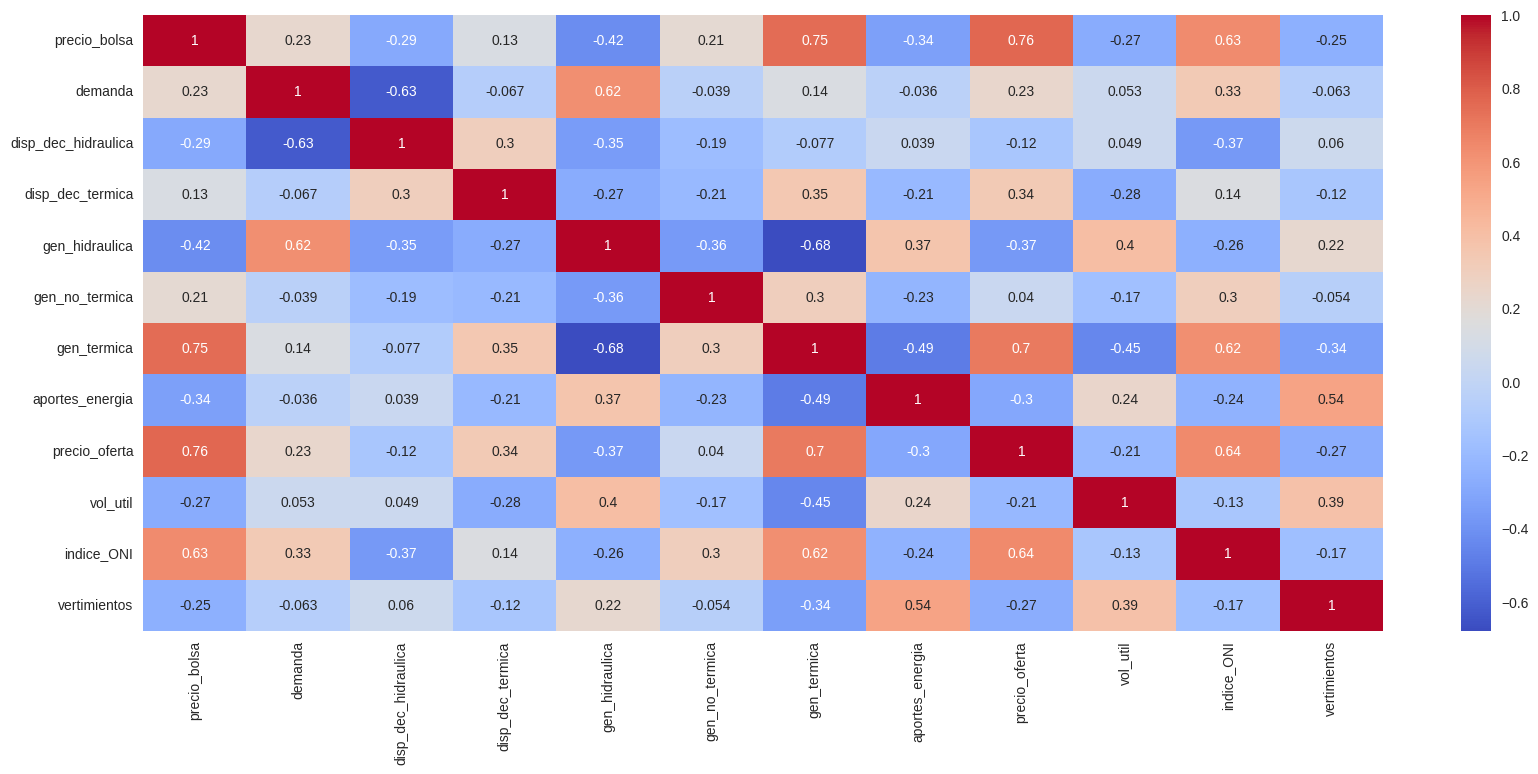

In [19]:
# Heatmap of correlation matrix
plt.figure(figsize = (20,8))
correlation_matrix = df_filtrado.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [20]:
# Configurar el estilo y los parámetros
sns.set(style="ticks", palette="muted")
# Graficar diagramas de dispersión de cada métrica
sns.pairplot(df_filtrado.dropna(), diag_kind='kde', height=2)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

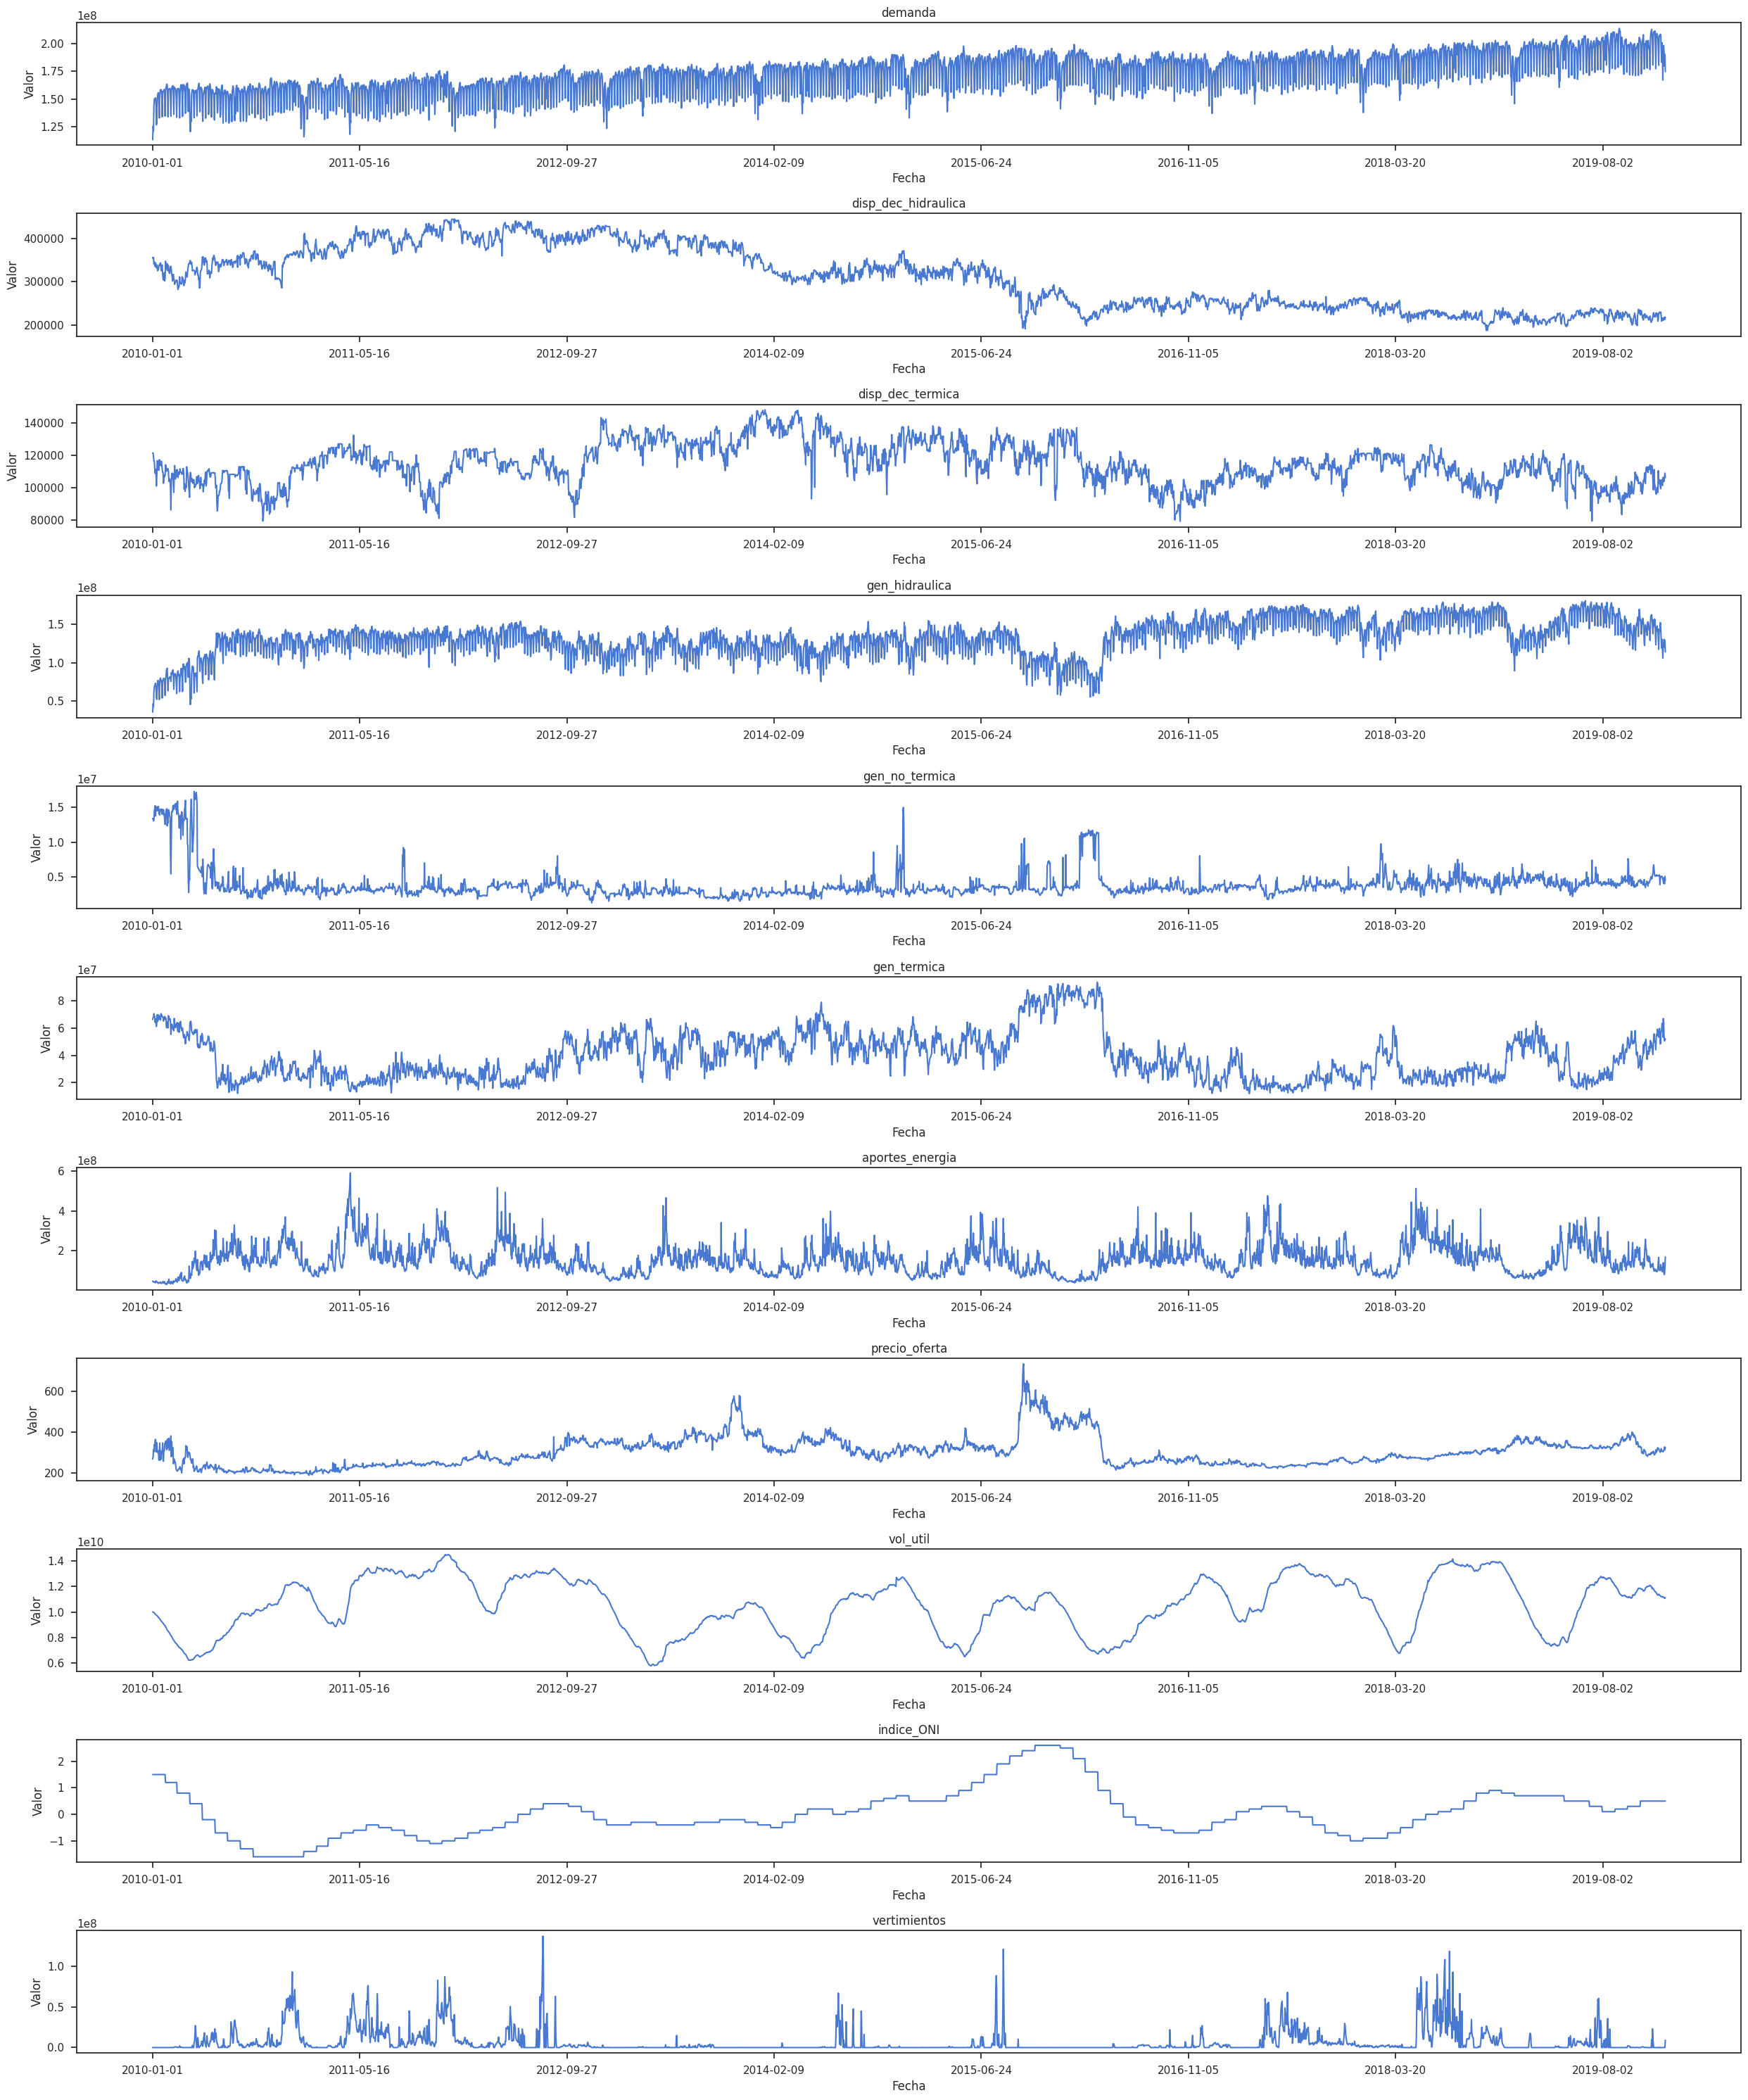

In [21]:
# Configurar las filas y columnas para los subplots
num_rows = len(df_filtrado.columns) - 1 # // 1 + 1  # Calcular el número de filas necesario para los subgráficos
num_cols = 1  # Puedes cambiar este número si deseas mostrar más columnas

# Crear los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 30))
plt.subplots_adjust(top=0.9)  # Adjust the value as per your requirement

# Iterar sobre cada columna y crear un subplot
for i, columna in enumerate(df_filtrado[[column for column in df_filtrado.columns if "precio_bolsa" not in column.lower()]].columns):
    row = i# // num_cols
    col = i# % num_cols
    ax = axes[row]#, col]
    df_filtrado[columna].plot(ax=ax)
    ax.set_title(columna)
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Valor')


# Ajustar el diseño y mostrar los subplots
plt.tight_layout()
plt.show()